In [6]:
import numpy as np
import matplotlib.pyplot as plt
import torch 
torch.set_default_dtype(torch.float64)
import torch.nn as nn
import copy
import random

In [7]:
import config as cfg
from model import DeepNN
from utils import relative_l2, set_seed
from train_reg import train_model_reg
from train_pde import train_model_pde

In [9]:
set_seed(0)
model = DeepNN().to(cfg.device_name)
model = train_model_reg(model, Nfit=150, lr=1e-2)

lbfgs : 0 - ref_rl2 3.0339e-01 
lbfgs : 50 - ref_rl2 1.7568e-04 
lbfgs : 100 - ref_rl2 8.7185e-05 
lbfgs : 149 - ref_rl2 8.6974e-05 


In [10]:
set_seed(50)
model_cur = DeepNN().to(cfg.device_name)
model_cur.load_state_dict(copy.deepcopy(model.state_dict()))
model_cur = train_model_pde(model_cur, Nfit=200, lr=1)

adam : 0 - ref_rl2 8.6399e-05 - pde 1.2572e-03 - lbc 1.5848e-04 - rbc 9.8692e-05 - tbc 4.9957e-03 - bbc 5.0239e-03
adam : 10 - ref_rl2 4.0498e-05 - pde 3.4717e-04 - lbc 2.4537e-05 - rbc 5.4835e-05 - tbc 4.1224e-03 - bbc 4.3024e-03
adam : 20 - ref_rl2 3.4695e-05 - pde 2.3642e-04 - lbc 9.5641e-06 - rbc 1.4672e-05 - tbc 4.0184e-03 - bbc 4.1532e-03
adam : 30 - ref_rl2 3.1760e-05 - pde 1.9075e-04 - lbc 5.0175e-06 - rbc 1.1410e-05 - tbc 3.9439e-03 - bbc 4.0173e-03
adam : 40 - ref_rl2 3.0885e-05 - pde 1.7553e-04 - lbc 3.1044e-06 - rbc 1.4022e-05 - tbc 3.8795e-03 - bbc 3.9668e-03
adam : 50 - ref_rl2 3.0485e-05 - pde 1.8209e-04 - lbc 1.7709e-06 - rbc 5.5363e-06 - tbc 3.7888e-03 - bbc 3.8225e-03
adam : 60 - ref_rl2 2.9677e-05 - pde 1.8733e-04 - lbc 1.2168e-06 - rbc 6.7585e-06 - tbc 3.5624e-03 - bbc 3.7571e-03
adam : 70 - ref_rl2 2.9367e-05 - pde 1.8385e-04 - lbc 8.4449e-07 - rbc 1.5841e-05 - tbc 3.5378e-03 - bbc 3.7499e-03
adam : 80 - ref_rl2 2.9381e-05 - pde 1.9130e-04 - lbc 6.8199e-07 - rbc 1.

In [11]:
X = cfg.X.detach().cpu()
Y = cfg.Y.detach().cpu()
E_reg = model(cfg.inp_fine, cfg.Z_fine).detach().cpu().reshape(cfg.Nx, cfg.Ny)
E_pinn = model_cur(cfg.inp_fine, cfg.Z_fine).detach().cpu().reshape(cfg.Nx, cfg.Ny)
E_ref = cfg.E_ref.cpu()

In [12]:
print('Regression Solution rl2: {:.4e}'.format(relative_l2(E_ref, E_reg)))
print('PINN Solution rl2: {:.4e}'.format(relative_l2(E_ref, E_pinn)))

Regression Solution rl2: 8.6974e-05
PINN Solution rl2: 2.6432e-05


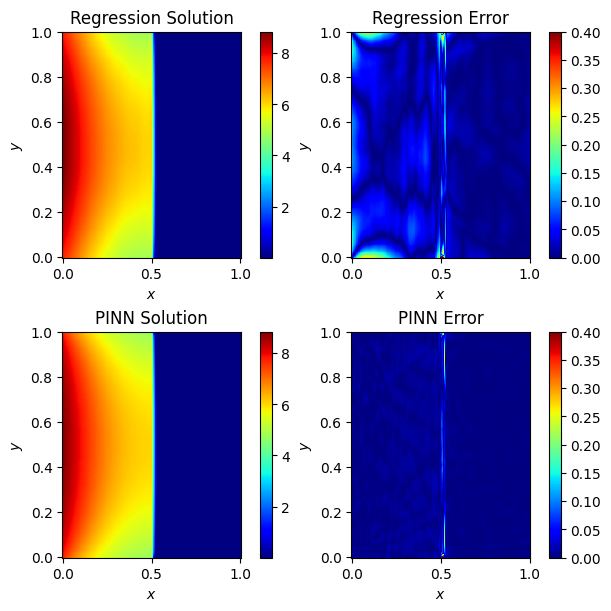

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(6, 6), layout='constrained')

vmin = E_ref.min()
vmax = E_ref.max()

pcm = axs[0][0].pcolormesh(X, Y, E_reg, vmin=vmin, vmax=vmax, cmap='jet')
axs[0][0].set_title("Regression Solution")
axs[0][0].set_xlabel("$x$")
axs[0][0].set_ylabel("$y$")
fig.colorbar(pcm, ax=axs[0][0])

pcm = axs[0][1].pcolormesh(X, Y, (E_ref - E_reg).abs(), vmin=0, vmax=0.4, cmap='jet')
axs[0][1].set_title("Regression Error")
axs[0][1].set_xlabel("$x$")
axs[0][1].set_ylabel("$y$")
fig.colorbar(pcm, ax=axs[0][1])

pcm = axs[1][0].pcolormesh(X, Y, E_pinn, vmin=vmin, vmax=vmax, cmap='jet')
axs[1][0].set_title("PINN Solution")
axs[1][0].set_xlabel("$x$")
axs[1][0].set_ylabel("$y$")
fig.colorbar(pcm, ax=axs[1][0])

pcm = axs[1][1].pcolormesh(X, Y, (E_ref - E_pinn).abs(), vmin=0, vmax=0.4, cmap='jet')
axs[1][1].set_title("PINN Error")
axs[1][1].set_xlabel("$x$")
axs[1][1].set_ylabel("$y$")
fig.colorbar(pcm, ax=axs[1][1])